In [1]:
#use dataset advertising.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("advertising.csv")

In [4]:
#to show first 5 records
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape #to show no. of rows and columns in given dataset

(200, 5)

In [6]:
#to delete Unnamed: 0 permanently from df
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#to check null values in dataset
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
#to check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


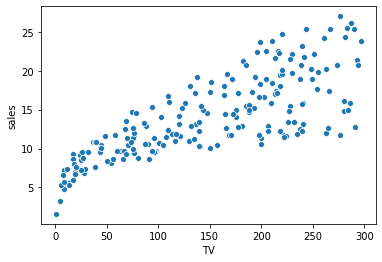

In [10]:
#create scatterplot between TV(input)and target sales(output) , to check
#relation between input and output 
sns.scatterplot(data=df,x="TV",y="sales") #hete x : input and y:output
plt.show()

In [11]:
#Nice Upward growth that means as we investment more on TV then the sales is
#also increasing means got +ve good correlation between TV ans sales

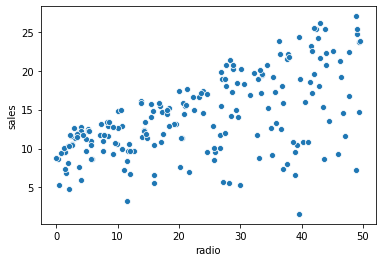

In [12]:
#same ae rest of column itself
#create scatterplot between radio(input)and target sales(output) , to check
#relation between input and output 
sns.scatterplot(data=df,x="radio",y="sales") #hete x : input and y:output
plt.show()

In [13]:
#See the plot looks better bot lot of data scattered  overhere +ve
#correlation but correaltion is less as compared to TV

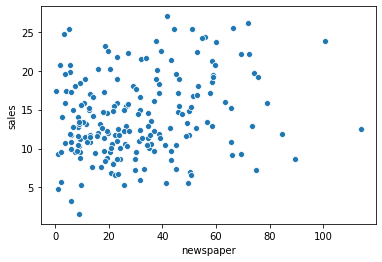

In [14]:
#same ae rest of column itself
#create scatterplot between newspaper(input)and target sales(output) , to check
#relation between input and output 
sns.scatterplot(data=df,x="newspaper",y="sales") #hete x : input and y:output
plt.show()

In [15]:
#see the plot , It is very bad correlation because data all over scattered
# shows no -ve corr or +ve corr 

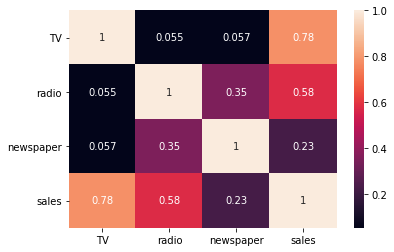

In [16]:
#check correlation value : use corr()  inbuilt method 
#use heatmap()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
#My observation Good correlation with TV and slightly with radio 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
#Performing the modeling
# Modeling with TV and sales
#here TV : input variable and target : sales
#select Input X and output Y from dataset
X=df[["TV"]] #input always 2D array because expect input 2D array
Y=df["sales"] #output means target 1 D array

In [20]:
#train test split : we divide the data into 70% - 30% 
#70% for training  and 30% for testing 

In [21]:
#inbuilt function train_test_split()  which define the inbuilt class
#train_test_split  
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
# train_test_split() returns 4 output , it is passing arguments function
#1. passing parameter : input  2. output  3. test_size=0.3 and 4 random_state

In [23]:
X_train.shape

(140, 1)

In [24]:
X_test.shape

(60, 1)

In [25]:
X_train.head(10)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [26]:
#perform the simple Linear  Regression model 
#call class LinearRegression
from sklearn.linear_model import LinearRegression

In [27]:
#create the object of LinearRegression
lr=LinearRegression()

In [28]:
#We train the model with 70% data: 
#use fit() inbuilt method of  LinearRegression class
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#check coefficient 
lr.coef_

array([0.04812204])

In [30]:
#check intercept
lr.intercept_

6.923519536059554

In [31]:
#testing the model with 30%  use inbuilt method predict() : which define
#in LinearRegression class
Y_pred=lr.predict(X_test)   #Y_pred=m*X_test+b

In [32]:
print(Y_pred)

[17.06764591 16.66823297 11.52879892 20.4073156  19.1368937  20.57093054
 14.78184893 15.62398466 10.32093567 17.2890073  14.83959538 10.25356482
 17.25532187 12.20731971 17.78947654 12.97246017 13.26119242 20.91259704
  8.1554438  17.06283371 11.75497252 10.18619396  8.13138278 12.09182681
 12.35649804 15.98971218  8.99757953 18.89628349 14.95027608 18.47762173
 18.46799732 18.2081383  14.12738917 15.11389102 18.87703468 15.82128503
 17.62586159 13.15051172 17.35637816  7.86671155  7.55391828 11.2737521
  7.82340171 16.74522823  7.27481044 14.01189627 10.68666319 17.89534503
 16.78853807 17.96752809 20.864475   12.84734286  7.85708714 15.71060434
 19.70473379 14.89252963 17.43818563  8.12657058 18.0926454   8.99276733]


In [33]:
print(X_test)

        TV
58   210.8
40   202.5
34    95.7
102  280.2
184  253.8
198  283.6
95   163.3
4    180.8
29    70.6
168  215.4
171  164.5
18    69.2
11   214.7
89   109.8
110  225.8
118  125.7
159  131.7
35   290.7
136   25.6
59   210.7
51   100.4
16    67.8
44    25.1
94   107.4
31   112.9
162  188.4
38    43.1
28   248.8
193  166.8
27   240.1
47   239.9
165  234.5
194  149.7
177  170.2
176  248.4
97   184.9
174  222.4
73   129.4
69   216.8
172   19.6
108   13.1
107   90.4
189   18.7
14   204.1
56     7.3
19   147.3
114   78.2
39   228.0
185  205.0
124  229.5
98   289.7
123  123.1
119   19.4
53   182.6
33   265.6
179  165.6
181  218.5
106   25.0
199  232.1
138   43.0


In [34]:
print(Y_test)

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64


In [35]:
#mean squared error MSE=Residual sum of squared/No of records
#RSS =sum(test_Y-Y_pred)^2
from sklearn.metrics import mean_squared_error
#mean_squared_error inbuilt class

In [36]:
#mean_squared_error() inbuilt function of inbuilt class mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean squared error : ",mse)
#root mean squared error RMSE
rmse=np.sqrt(mse)
print("root mean squared error RMSE : ",rmse)

Mean squared error :  10.571057434656955
root mean squared error RMSE :  3.251316261863333


In [37]:
#For Evaluation Either model is correct prediction or not,
#calculate r2-score(0-1)
#formula r2-score=(TSS-RSS)/TSS

from sklearn.metrics import r2_score #r2_score inbuilt class

In [38]:
r2_score(Y_test,Y_pred) #r2_score() inbuilt function which define in r2_score
#class 

0.575061860494331

In [39]:
#here r2_score =0.57 but just ok

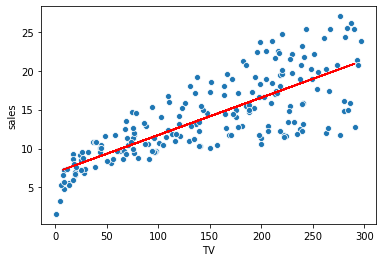

In [40]:
#visualise 
sns.scatterplot(data=df,x="TV",y="sales") #hete x : input and y:output
plt.plot(X_test["TV"],Y_pred,color="red")
plt.show()

In [41]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
#Performing the modeling
# Modeling with radio and sales
#here radio : input variable and target : sales
#select Input X and output Y from dataset
X=df[["radio"]] #input always 2D array because expect input 2D array
Y=df["sales"] #output means target 1 D array

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [44]:
#create the object of LinearRegression
lr=LinearRegression()

In [45]:
#We train the model with 70% data: 
#use fit() inbuilt method of  LinearRegression class
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#check coefficient 
lr.coef_

array([0.1874808])

In [47]:
#check intercept
lr.intercept_

9.440936561425886

In [48]:
#testing the model with 30%  use inbuilt method predict() : which define
#in LinearRegression class
Y_pred=lr.predict(X_test)   #Y_pred=m*X_test+b

In [49]:
#mean_squared_error() inbuilt function of inbuilt class mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean squared error : ",mse)
#root mean squared error RMSE
rmse=np.sqrt(mse)
print("root mean squared error RMSE : ",rmse)

Mean squared error :  14.604130559272193
root mean squared error RMSE :  3.8215351050686674


In [50]:
#Evaluation of model
r2_score(Y_test,Y_pred) #r2_score() inbuilt function which define in r2_score
#class 

0.41293932917162335

In [51]:
#bad 

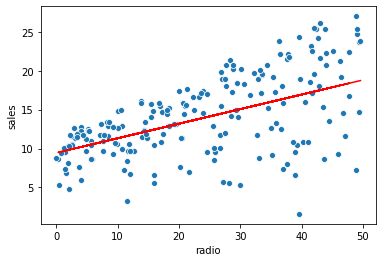

In [52]:
#visualise 
sns.scatterplot(data=df,x="radio",y="sales") #hete x : input and y:output
plt.plot(X_test["radio"],Y_pred,color="red")
plt.show()

In [53]:
#Performing the modeling
# Modeling with radio and sales
#here newspaper : input variable and target : sales
#select Input X and output Y from dataset
X=df[["newspaper"]] #input always 2D array because expect input 2D array
Y=df["sales"] #output means target 1 D array

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [55]:
#create the object of LinearRegression
lr=LinearRegression()

In [56]:
#We train the model with 70% data: 
#use fit() inbuilt method of  LinearRegression class
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#check coefficient 
lr.coef_

array([0.06532045])

In [58]:
#check intercept
lr.intercept_

11.82966888487788

In [59]:
#testing the model with 30%  use inbuilt method predict() : which define
#in LinearRegression class
Y_pred=lr.predict(X_test)   #Y_pred=m*X_test+b

In [60]:
#mean_squared_error() inbuilt function of inbuilt class mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean squared error : ",mse)
#root mean squared error RMSE
rmse=np.sqrt(mse)
print("root mean squared error RMSE : ",rmse)

Mean squared error :  25.497452374414927
root mean squared error RMSE :  5.049500210358935


In [61]:
#Evaluation of model
r2_score(Y_test,Y_pred) #r2_score() inbuilt function which define in r2_score
#class 

-0.024953278429509007

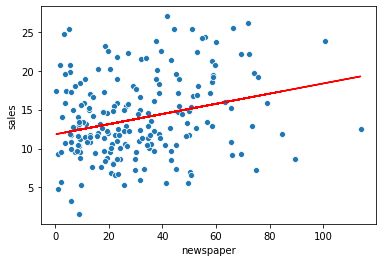

In [62]:
#visualise 
sns.scatterplot(data=df,x="newspaper",y="sales") #hete x : input and y:output
plt.plot(X_test["newspaper"],Y_pred,color="red")
plt.show()

In [63]:
#r2-score of newspaper : is very bad

In [64]:
''' Perfrom TV with sales :  MSE =10.57   Coefficient or slope :0.04
    Perfrom radio with sales :  MSE =14.60   Coefficient or slope :0.18
    Perfrom newspaper  with sales :  MSE =25.49  Coefficient or slope :0.06'''

' Perfrom TV with sales :  MSE =10.57   Coefficient or slope :0.04\n    Perfrom radio with sales :  MSE =14.60   Coefficient or slope :0.18\n    Perfrom newspaper  with sales :  MSE =25.49  Coefficient or slope :0.06'

In [65]:
'''Here MSE of newspaper with sales is very large as compared to TV and radio
and MSE of rsdio is large as compared to TV '''

'Here MSE of newspaper with sales is very large as compared to TV and radio\nand MSE of rsdio is large as compared to TV '

In [66]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [67]:
#Multiple Linear Regression : -  MLR means many input  and one out
#here input : TV,radio and newspaper  and target : sales 
X=df[["TV","radio","newspaper"]]#input 2D
Y=df["sales"] #target 1 D

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [69]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [70]:
#create the object of LinearRegression
lr=LinearRegression()

In [71]:
#We train the model with 70% data: 
#use fit() inbuilt method of  LinearRegression class
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
#check coefficient or slope (TV ,radio ,newspaper)
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [73]:
lr.intercept_

2.9372157346906125

In [74]:
#Y_pred=m1*TV+m2*radio+m3*newspaper+b
'''Y=mx+b  x=TV
X1=TV   X2=radio  X3=newspaper
0.04    0.17      0
Y=m1*x1+m2*x2+m3*x3+b
Y=0.04*210.8+0.17*49.6+0*37.7+2.93
Y=8.432+8.432+0+2.93
Y_pred=19.794'''

'Y=mx+b  x=TV\nX1=TV   X2=radio  X3=newspaper\n0.04    0.17      0\nY=m1*x1+m2*x2+m3*x3+b\nY=0.04*210.8+0.17*49.6+0*37.7+2.93\nY=8.432+8.432+0+2.93\nY_pred=19.794'

In [75]:
#testing the model with 30%  use inbuilt method predict() : which define
#in LinearRegression class
Y_pred=lr.predict(X_test)

In [76]:
#mean_squared_error() inbuilt function of inbuilt class mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean squared error : ",mse)
#root mean squared error RMSE
rmse=np.sqrt(mse)
print("root mean squared error RMSE : ",rmse)

Mean squared error :  1.9289249074665737
root mean squared error RMSE :  1.3888574107756972


In [77]:
#Evaluation of model
r2_score(Y_test,Y_pred) #r2_score() inbuilt function which define in r2_score
#class 

0.9224605706201434

In [78]:
#trick means hack 
#Either check linear relation between input and output
#calculate residuals=Original output(testing)-predicted output(testing data of X)
residual=Y_test-Y_pred
residual

58     2.136817
40     0.158621
34     1.808554
102   -3.116317
184   -1.070471
198    1.708007
95     0.617457
4     -0.541387
29     1.347060
168   -0.224753
171    0.060771
18     1.459805
11     0.136701
89     0.071469
110   -1.691587
118    0.398261
159    0.465959
35    -4.525915
136   -1.543275
59     0.343472
51     1.346905
16    -0.294660
44    -0.234138
94     1.027747
31     0.517840
162   -0.126586
38     0.359318
28    -0.546769
193    1.407888
27    -1.301787
47     1.636405
165   -2.804843
194    1.036479
177   -0.670989
176    0.229407
97     0.132310
174   -2.503995
73     0.922706
69     1.381084
172    0.161667
108    1.629688
107    1.422396
189    0.704768
14     0.585025
56    -2.818682
19     0.490975
114   -0.336976
39     1.141172
185    2.037284
124    0.146192
98     1.296391
123    0.350142
119   -0.114749
53     1.422384
33    -1.539964
179    0.089081
181   -2.000527
106    1.091553
199   -1.969534
138    0.032309
Name: sales, dtype: float64

In [79]:
Y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

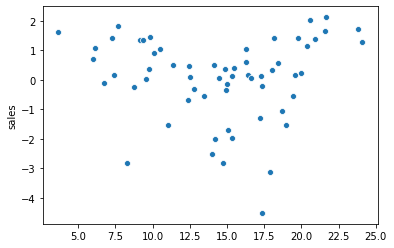

In [80]:
sns.scatterplot(Y_pred,residual) #x=Y_pred  and y=residual
plt.show()

In [81]:
#Assumption of Linear regression : -
#1. There should be linear relationship between input and output
